In [1]:
# For reading csv files
import csv
# For file manipulation
import os
import shutil
# For plotting
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

In [2]:
# Reading data from csv file and storing it in a dictionary (well, not really a python dictionary)
x = open('MILES_params.csv', 'r')
raw_data = csv.DictReader(x)

In [3]:
# Data to search for in the list
# Name, Teff, log(g), Fe/H
stars = [("HD060522", "3884", "1.2", '-0.12'), 
         ('HD074462', '4527', '1.53', '-1.41'), 
         ('HD118100', '4179', '4.5', '-0.07'), 
         ('HD123299', '10100', '3.3', '-0.56'), 
         ('HD151203', '3640', '0.7', '-0.1'), 
         ('HD172103', '6418', '3.68', '-0.22'),
         ('HD180928', '3969', '1.3', '-0.35'),
         ('HD199191', '4767', '2.25', '-0.64'),
         ('HD221830', '5688', '4.16', '-0.44')
        ]


In [4]:
# Processing Data
data = []
for x in raw_data:
    c = [x['Name'],x['Spect Name'],x['Spect Type'],x['Teff'],x['log g'],x['Fe/H'],x['class']]
    data.append(c)

In [5]:
# Binary Search Algorithm to boost speed of search
def search(l, q, parameters):
    # l is the list in which you have to search
    # q is the query you want to search in l
    start, end = 0, len(l) - 1
    mid = (start + end) // 2
    while start <= end:
        mid = (end + start) // 2
        name = l[mid][0].strip()
        if name < q:
            start = mid + 1
        elif name > q:
            end = mid - 1
        else:
            return mid
    return -1

In [6]:
# Defing folders
source = r'all_spectra/'
destination = r'spectra/'

In [7]:
for star in stars:
    ans = search(data, star[0], star)
    file_name = data[ans][1] + ".fits"
    new_file_name = star[0] + ".fits"
    shutil.copy2(source + file_name, destination + new_file_name)

For this part of code, I took help from Astronomy StackExchange as I wasn't able to figure out how to process data using astropy.\
Link: [Astronomy Stack Exchange](https://astronomy.stackexchange.com/questions/43552/working-with-stellar-spectra-in-fits-format-in-python)

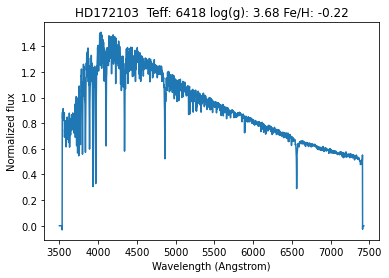

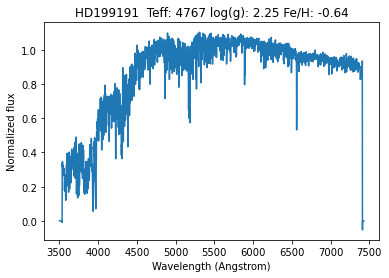

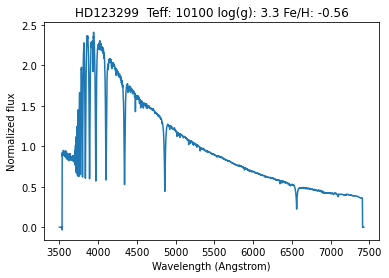

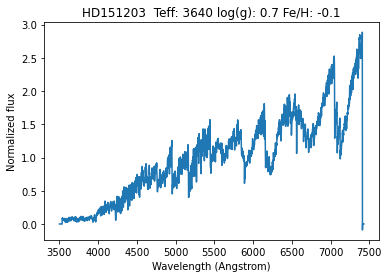

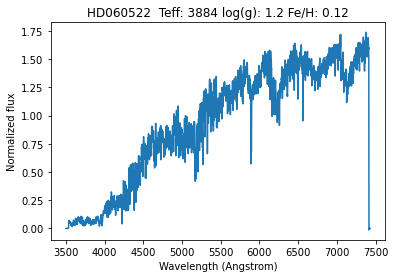

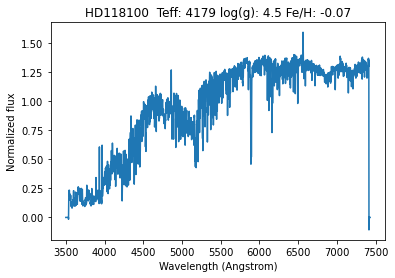

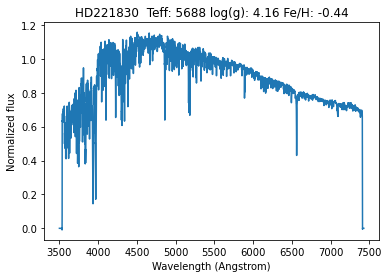

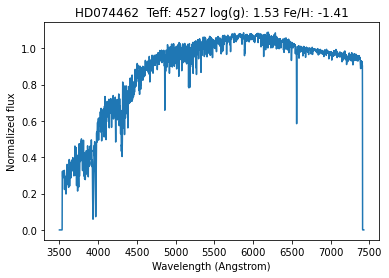

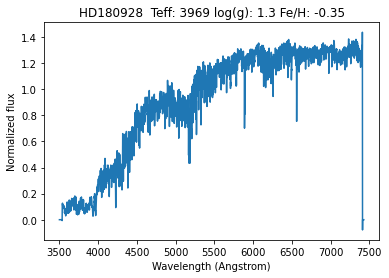

In [8]:
for path in os.listdir(destination):
    if os.path.isfile(os.path.join(destination, path)):
        currentpath = os.path.join(destination, path)
        
        # Name of star
        n_star = path.rsplit('.', maxsplit=1)[0]
        # get information
        title = data[search(data, n_star, None)]
        # Giving in None as parameters because it is not necessary and 
        # I am a bit lazy to change at other places
        title = title[0] + " " + "Teff: " + title[3] + " log(g): " + title[4] + " Fe/H: " + title[5]
        hdul = fits.open(currentpath)
        h_data = hdul[0].data
        h1 = hdul[0].header

        flux = h_data[0]
        w = WCS(h1, naxis=1, relax=False, fix=False)
        lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]

        plt.plot(lam, flux)
        plt.title(title)
        plt.xlabel('Wavelength (Angstrom)')
        plt.ylabel('Normalized flux')
        plt.savefig(fname="spectra_images/" + n_star + ".jpg")
        plt.show()
